In [1]:
import wfdb
import matplotlib.pyplot as plt

In [2]:
def inspect_header(file_path):
    record = wfdb.rdheader(file_path)
    print(f"Record Name: {record.record_name}")
    print(f"Number of Signals: {record.n_sig}")
    print(f"Sampling Frequency: {record.fs} Hz")
    print(f"Signal Length: {record.sig_len} samples")
    print(f"Signals: {record.sig_name}")
    print(f"Signal Description: {record.comments}")
    return record

def inspect_signal(file_path): 
    record = wfdb.rdrecord(file_path)
    signal = record.p_signal
    print(f"Signal Shape: {signal.shape}")
    print(f"First 10 values: {signal[:10]}")
    return signal

def inspect_annotation(file_path,annotation_type):
    annotation = wfdb.rdann(file_path, annotation_type)
    print(f"Annotation Type: {annotation_type}")
    print(f"Annotation Sample Points: {annotation.sample[:10]}")
    return annotation



In [3]:
#infant1 pre analysis
ecg1_header_path = 'infant1_ecg'
resp1_header_path = 'infant1_resp'

In [4]:
ecg_header = inspect_header(ecg1_header_path)
print('\n')
ecg_r_peaks = inspect_annotation('infant1_ecg', 'qrsc') #First 10 R Peaks
print('\n')
resp_header = inspect_header(resp1_header_path)
print('\n')
resp_peaks = inspect_annotation('infant1_resp','resp') #First 10 respiration peaks

Record Name: infant1_ecg
Number of Signals: 1
Sampling Frequency: 250 Hz
Signal Length: 41052191 samples
Signals: ['ECG']
Signal Description: []


Annotation Type: qrsc
Annotation Sample Points: [ 39 134 228 323 418 512 609 704 803 900]


Record Name: infant1_resp
Number of Signals: 1
Sampling Frequency: 500 Hz
Signal Length: 82122000 samples
Signals: ['RESP']
Signal Description: []


Annotation Type: resp
Annotation Sample Points: [88320 91725 91767 91800 91827 91860 91885 91925 92160 92227]


In [70]:
#Plotting ECG

def plot_ecg_signal(infant_number):
    # Load the ECG signal from the WFDB file
    record = wfdb.rdrecord(f'infant{infant_number}_ecg')

    # Extract signal and sampling frequency
    ecg_signal = record.p_signal[:, 0]  # Assuming single channel ECG
    fs = record.fs  # Sampling frequency

    # Create a time vector (in seconds)
    time = [i / fs for i in range(len(ecg_signal))]

    # Plot the ECG signal
    plt.figure(figsize=(12, 6))
    plt.plot(time, ecg_signal, label='ECG Signal')
    plt.title(f'Infant {infant_number} - ECG Signal')
    plt.xlabel('Time (seconds)')
    plt.ylabel('ECG Signal (mV)')
    plt.legend()
    plt.show()

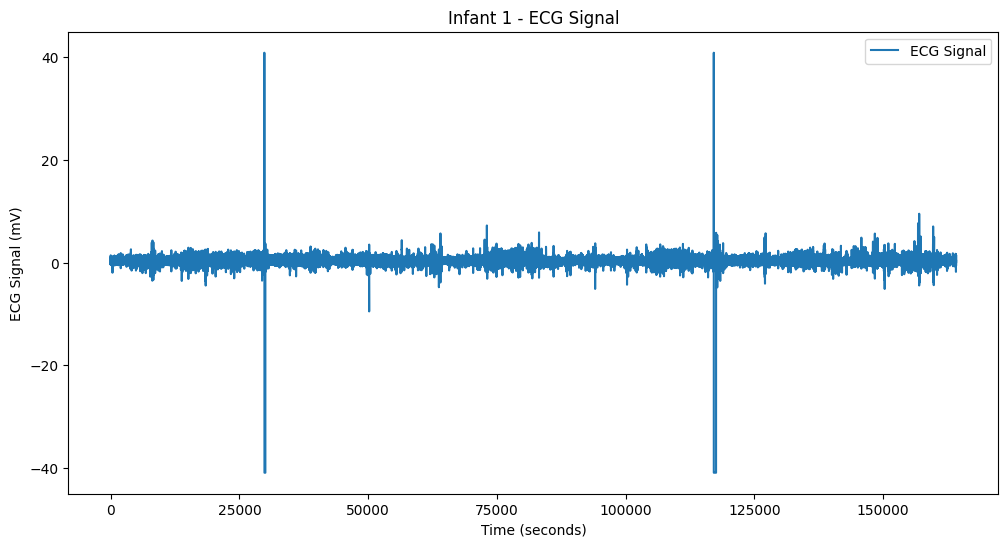

In [154]:
plot_ecg_signal(1)

In [69]:
def plot_ecg_segment(infant_number, start_sample, end_sample):
    # Load the ECG signal
    record = wfdb.rdrecord(f'infant{infant_number}_ecg')
    ecg_signal = record.p_signal[:, 0]  # Assuming single channel ECG
    fs = record.fs  # Sampling frequency

    # Extract the segment of the signal
    segment = ecg_signal[start_sample:end_sample]
    time_segment = [i / fs for i in range(start_sample, end_sample)]

    # Plot the segment
    plt.figure(figsize=(12, 6))
    plt.plot(time_segment, segment, label='ECG Segment')
    plt.title(f'Infant {infant_number} - ECG Signal (Samples {start_sample} to {end_sample})')
    plt.xlabel('Time (seconds)')
    plt.ylabel('ECG Signal (mV)')
    plt.legend()
    plt.show()

    return f"Sampling Rate: {fs}Hz " 


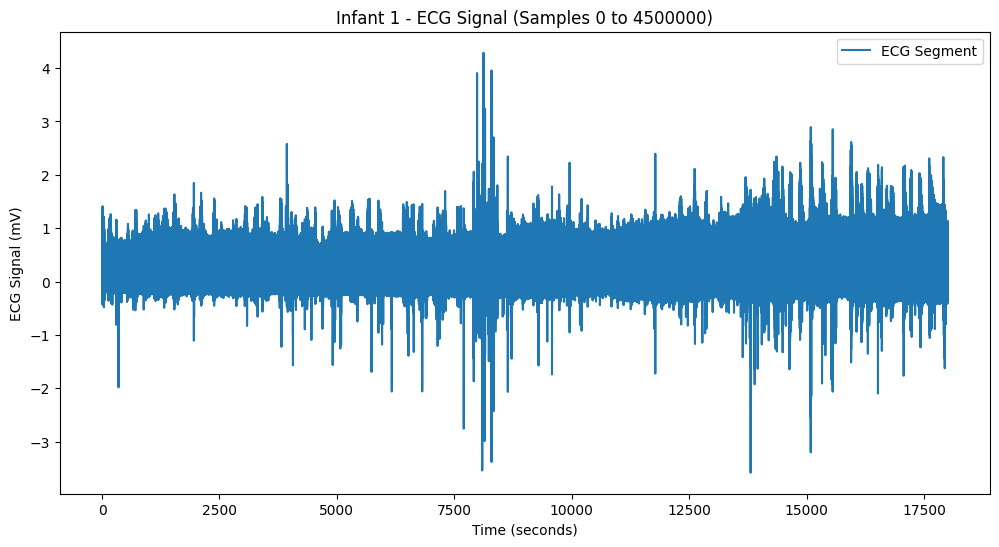

'Sampling Rate: 250Hz '

In [9]:
plot_ecg_segment(1,0,int(4.5e6))

In [10]:
def plot_resp_signal(infant_number):
    # Load the respiration signal from the WFDB file
    record = wfdb.rdrecord(f'infant{infant_number}_resp')

    # Extract signal and sampling frequency
    resp_signal = record.p_signal[:, 0]  # Assuming single channel respiration signal
    fs = record.fs  
    # Create a time vector (in seconds)
    time = [i / fs for i in range(len(resp_signal))]

    # Plot the respiration signal
    plt.figure(figsize=(12, 6))
    plt.plot(time, resp_signal, label='Respiration Signal', color='blue')
    plt.title(f'Infant {infant_number} - Respiration Signal')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Respiration Signal (arbitrary units)')
    plt.legend()
    plt.show()



C:\Users\elfo\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


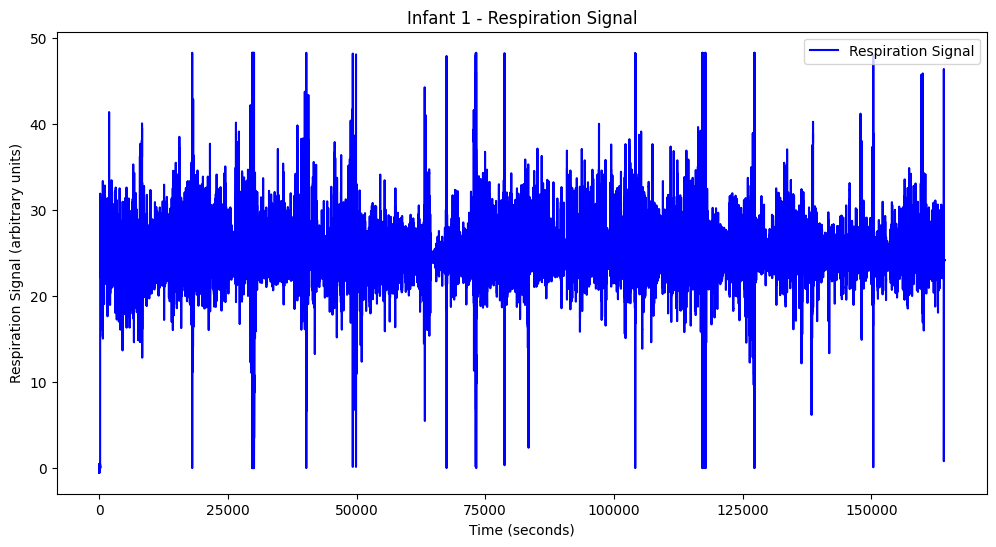

In [93]:
plot_resp_signal(1)

In [11]:

def plot_resp_segment(infant_number, start_sample, end_sample):
    # Load the resp signal
    record = wfdb.rdrecord(f'infant{infant_number}_resp')
    resp_signal = record.p_signal[:, 0]  # Assuming single channel Respiration
    fs = record.fs 

    # Extract the segment of the signal
    segment = resp_signal[start_sample:end_sample]
    time_segment = [i / fs for i in range(start_sample, end_sample)]

    # Plot the segment
    plt.figure(figsize=(12, 6))
    plt.plot(time_segment, segment, label='Resp Segment')
    plt.title(f'Infant {infant_number} - Resp Signal (Samples {start_sample} to {end_sample})')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Resp Signal (au)')
    plt.legend()
    plt.show()

    return f"Sampling Rate: {fs}Hz " 


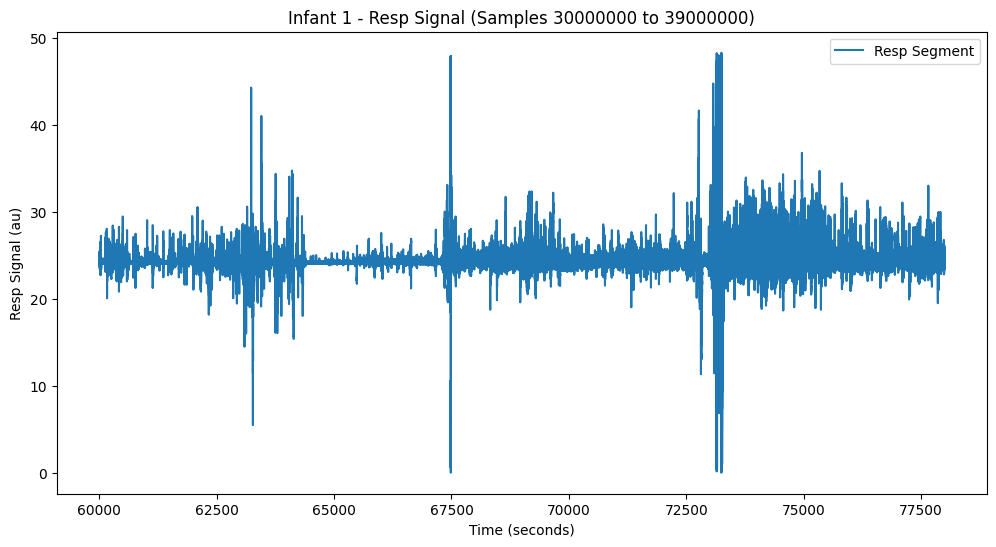

'Sampling Rate: 500Hz '

In [15]:
plot_resp_segment(1,int(30e6),int(30e6) + int(9e6))

In [185]:
#infant2 pre analysis
ecg2_header_path = 'infant2_ecg'
resp2_header_path = 'infant2_resp'

ecg2_header = inspect_header(ecg2_header_path)
print('\n')
ecg2_r_peaks = inspect_annotation('infant2_ecg', 'qrsc') #First 10 R Peaks
print('\n')
resp2_header = inspect_header(resp2_header_path)
print('\n')
resp2_peaks = inspect_annotation('infant2_resp','resp') #First 10 respiration peaks

Record Name: infant2_ecg
Number of Signals: 1
Sampling Frequency: 500 Hz
Signal Length: 78916000 samples
Signals: ['II']
Signal Description: []


Annotation Type: qrsc
Annotation Sample Points: [204735 204989 205245 205498 205754 206008 206262 206513 206763 207011]


Record Name: infant2_resp
Number of Signals: 1
Sampling Frequency: 50 Hz
Signal Length: 7891433 samples
Signals: ['RESP']
Signal Description: []


Annotation Type: resp
Annotation Sample Points: [ 56 111 164 209 263 316 392 425 473 550]


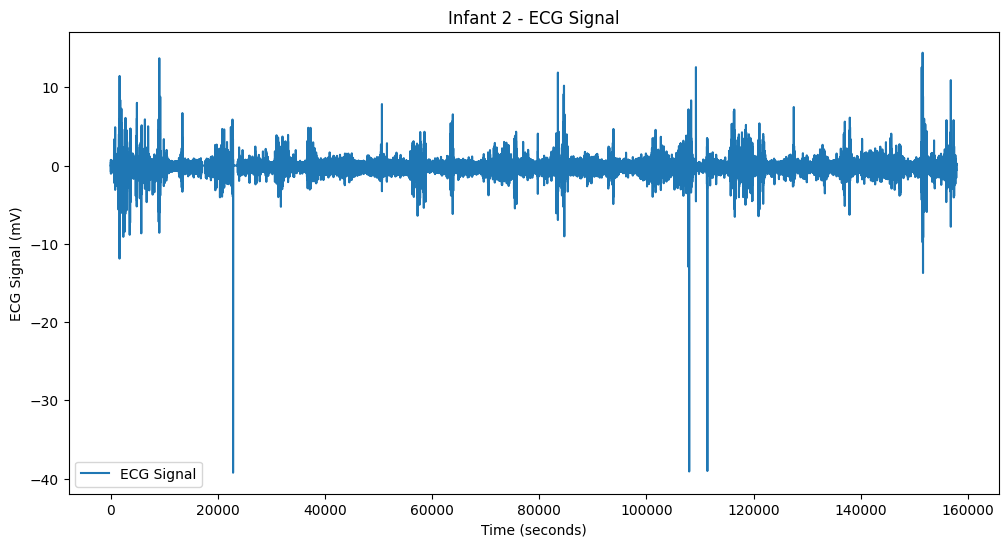

In [188]:
plot_ecg_signal(2)

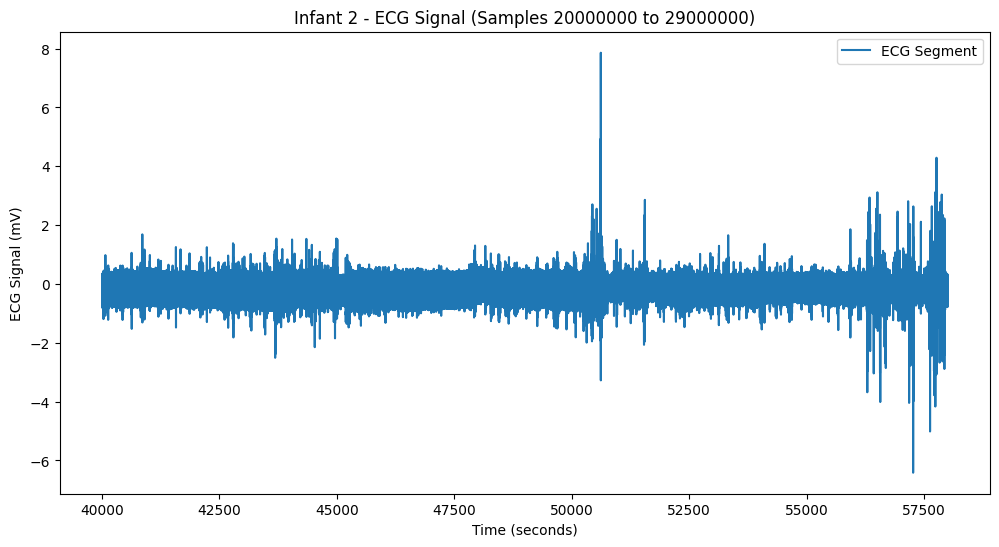

'Sampling Rate: 500Hz '

In [18]:
plot_ecg_segment(2,int(20e6),int(29e6))

C:\Users\elfo\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


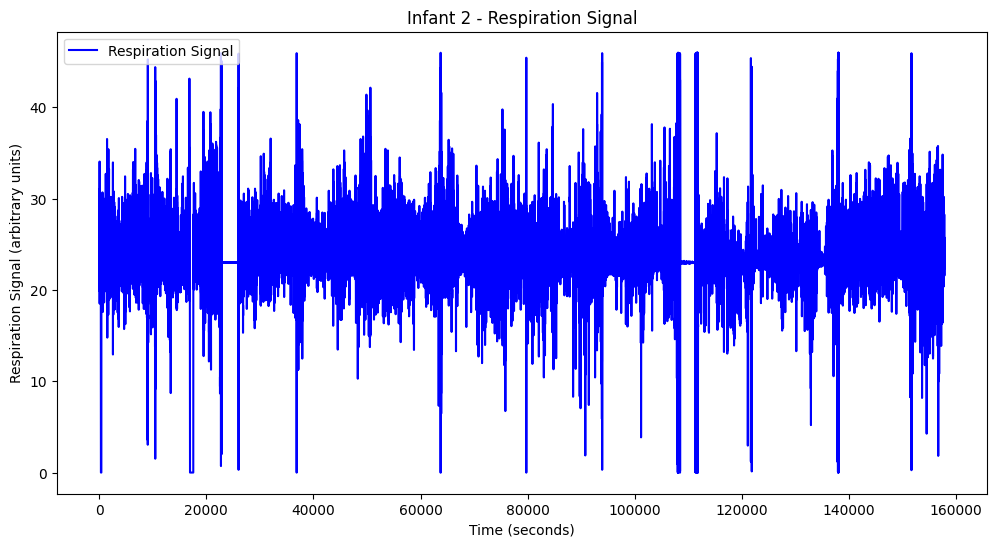

In [189]:
plot_resp_signal(2)

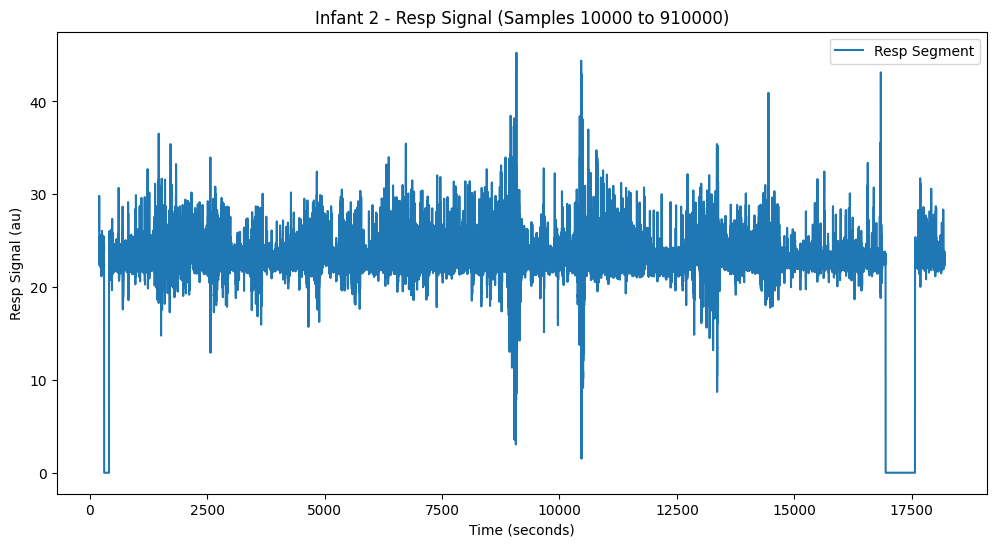

'Sampling Rate: 50Hz '

In [19]:
plot_resp_segment(2,10000,10000 + 900000)

In [190]:
#infant3 pre analysis 
ecg3_header_path = 'infant3_ecg'
resp3_header_path = 'infant3_resp'

ecg3_header = inspect_header(ecg3_header_path)
print('\n')
ecg3_r_peaks = inspect_annotation('infant3_ecg', 'qrsc') #First 10 R Peaks
print('\n')
resp3_header = inspect_header(resp3_header_path)
print('\n')
resp3_peaks = inspect_annotation('infant3_resp','resp') #First 10 respiration peaks

Record Name: infant3_ecg
Number of Signals: 1
Sampling Frequency: 500 Hz
Signal Length: 78684614 samples
Signals: ['II']
Signal Description: []


Annotation Type: qrsc
Annotation Sample Points: [ 185  481  782 1070 1354 1637 1917 2199 2474 2742]


Record Name: infant2_resp
Number of Signals: 1
Sampling Frequency: 50 Hz
Signal Length: 7891433 samples
Signals: ['RESP']
Signal Description: []


Annotation Type: resp
Annotation Sample Points: [14383 14433 14493 14542 14582 14628 14662 14696 14726 14756]


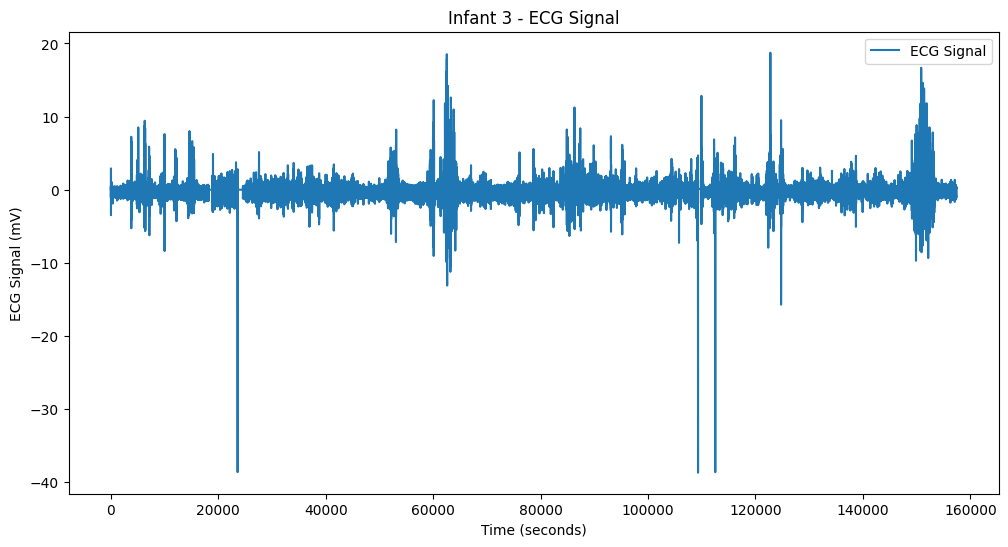

In [199]:
plot_ecg_signal(3)

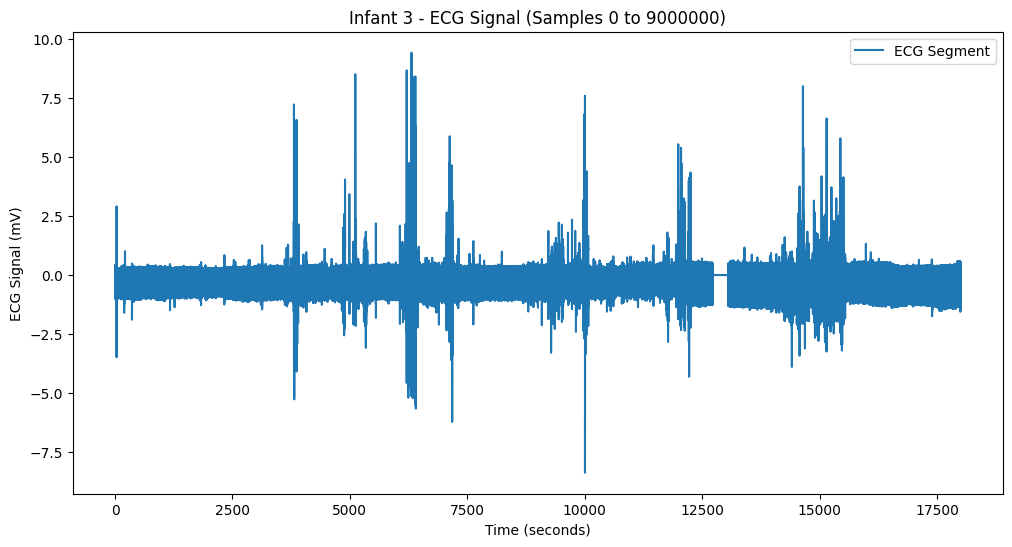

'Sampling Rate: 500Hz '

In [22]:
plot_ecg_segment(3,0,int(9e6))

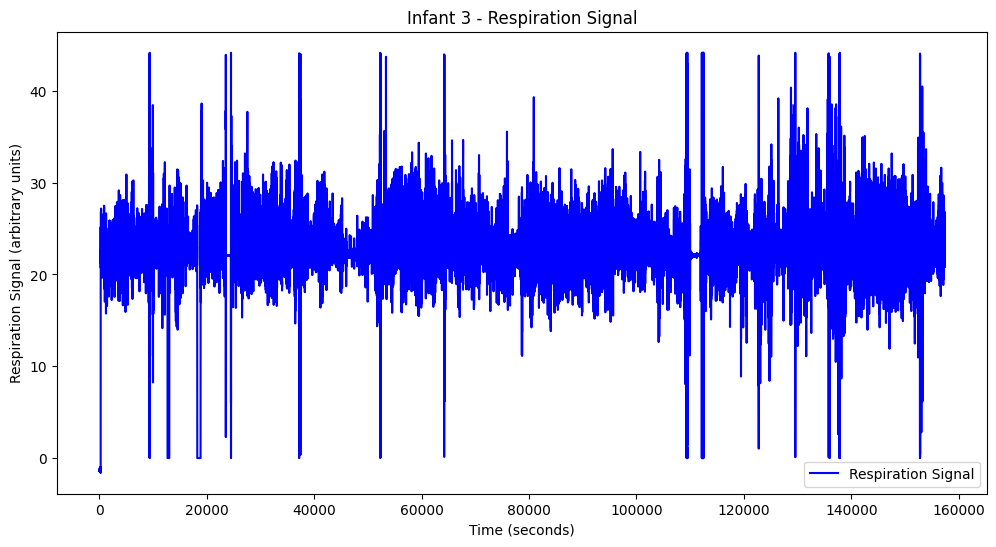

In [200]:
plot_resp_signal(3)

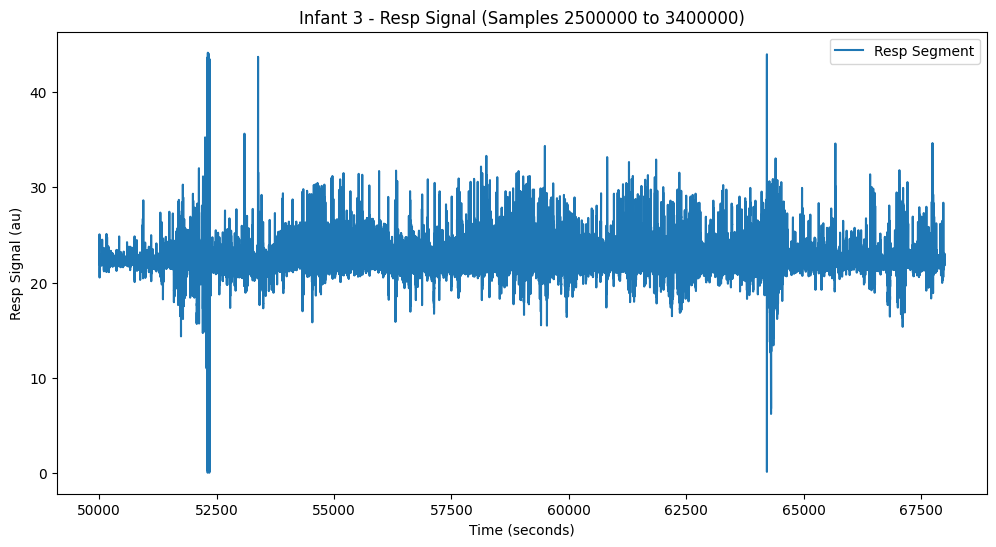

'Sampling Rate: 50Hz '

In [45]:
plot_resp_segment(3,int(2.5e6),int(2.5e6) + int(900e3))

In [201]:
#infant4 pre analysis
ecg4_header_path = 'infant4_ecg'
resp4_header_path = 'infant4_resp'

ecg4_header = inspect_header(ecg4_header_path)
print('\n')
ecg4_r_peaks = inspect_annotation('infant4_ecg', 'qrsc') #First 10 R Peaks
print('\n')
resp4_header = inspect_header(resp4_header_path)
print('\n')
resp4_peaks = inspect_annotation('infant4_resp','resp') #First 10 respiration peaks


Record Name: infant4_ecg
Number of Signals: 1
Sampling Frequency: 500 Hz
Signal Length: 84208000 samples
Signals: ['II']
Signal Description: []


Annotation Type: qrsc
Annotation Sample Points: [14127 14315 14501 14688 14873 15059 15244 15429 15612 15795]


Record Name: infant4_resp
Number of Signals: 1
Sampling Frequency: 50 Hz
Signal Length: 8420800 samples
Signals: ['RESP']
Signal Description: []


Annotation Type: resp
Annotation Sample Points: [ 39  67  93 124 152 180 207 234 260 293]


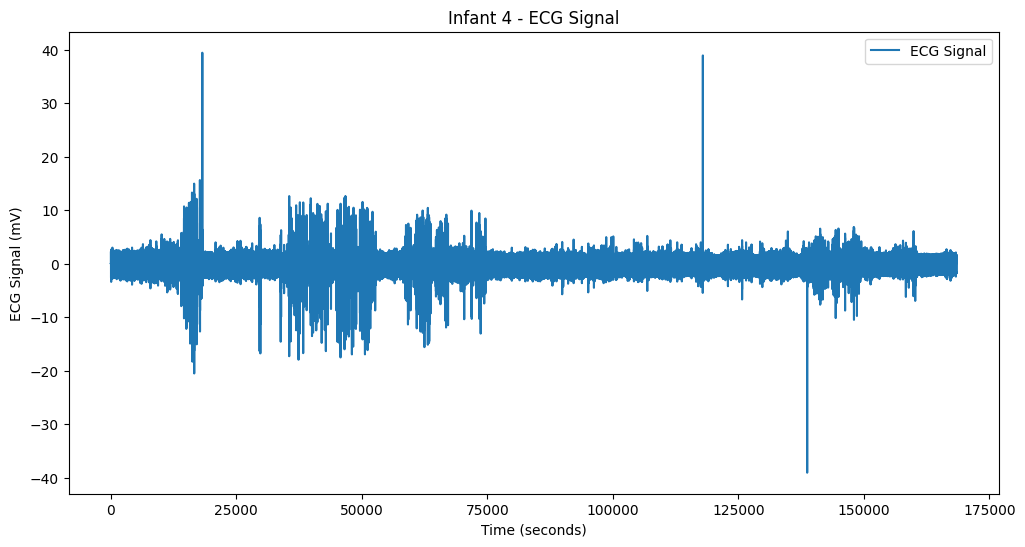

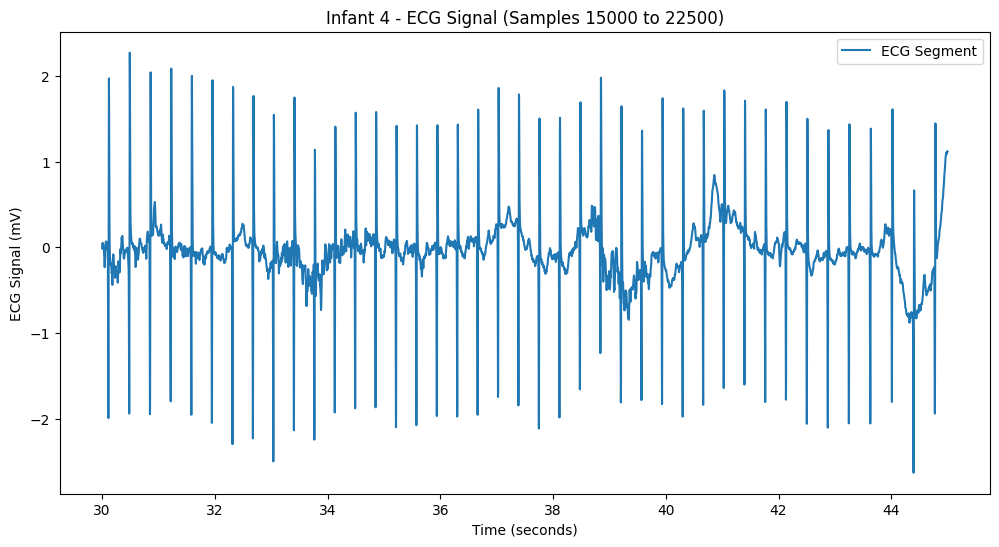

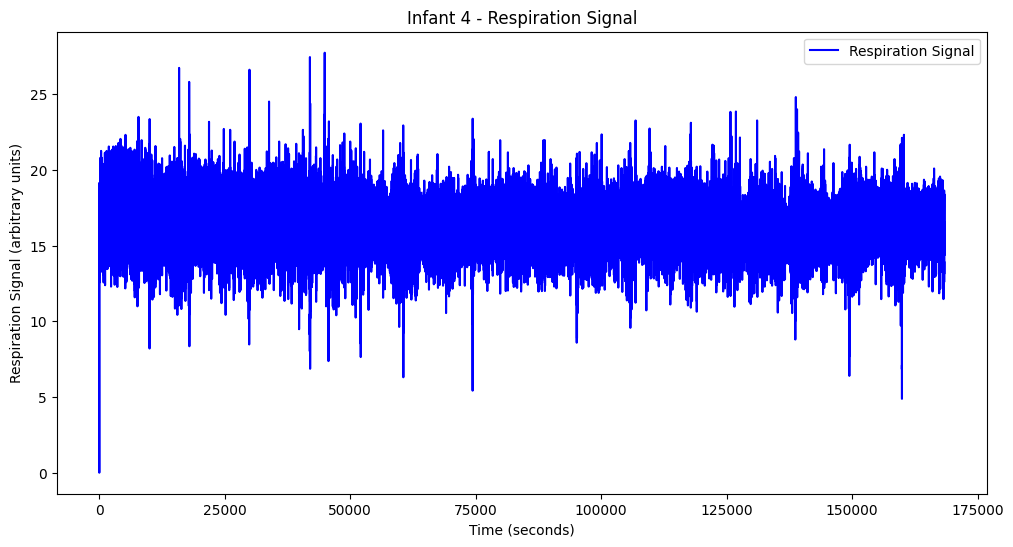

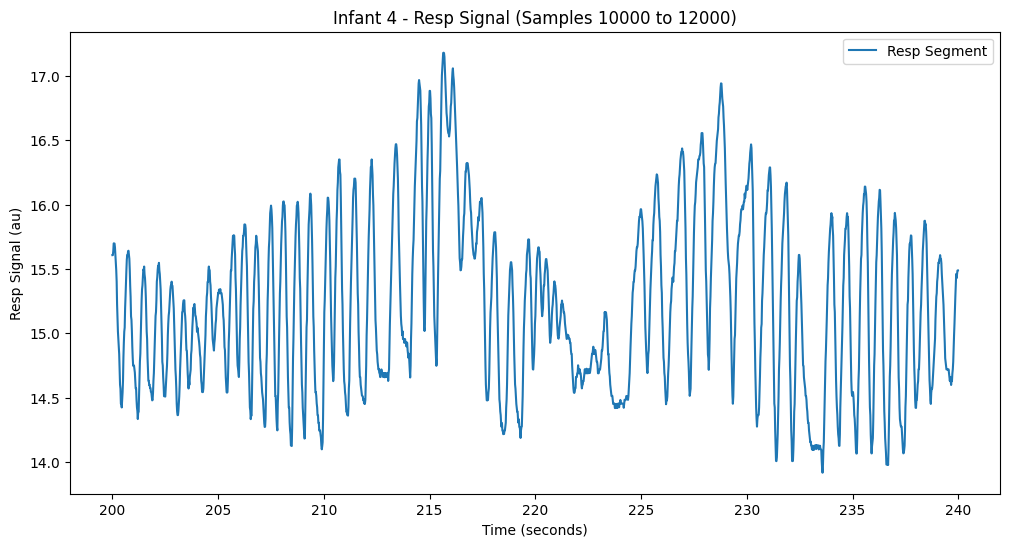

'Sampling Rate: 50Hz '

In [212]:
plot_ecg_signal(4)
plot_ecg_segment(4,15000,22500)
plot_resp_signal(4)
plot_resp_segment(4,10000, 12000)

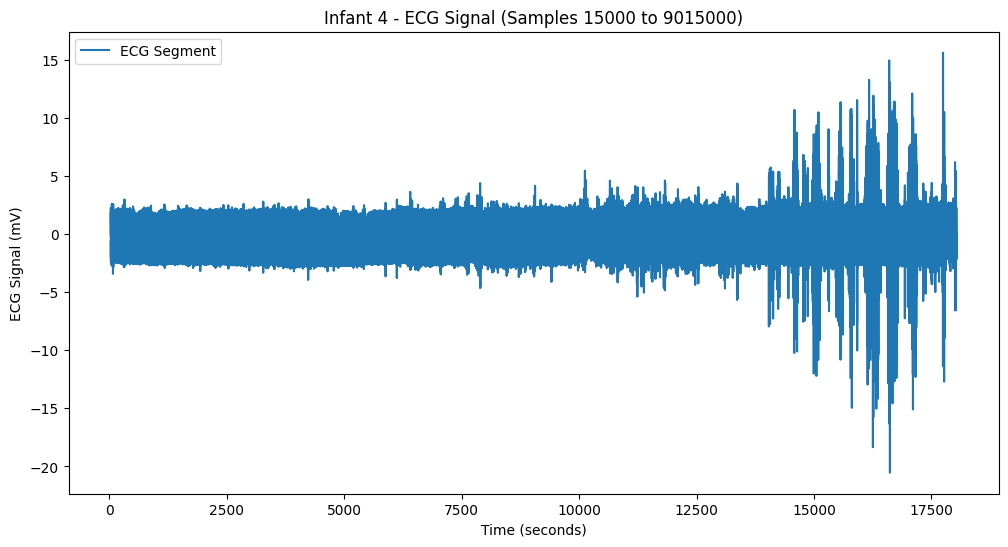

'Sampling Rate: 500Hz '

In [47]:
plot_ecg_segment(4,15000,15000 + int(9e6))

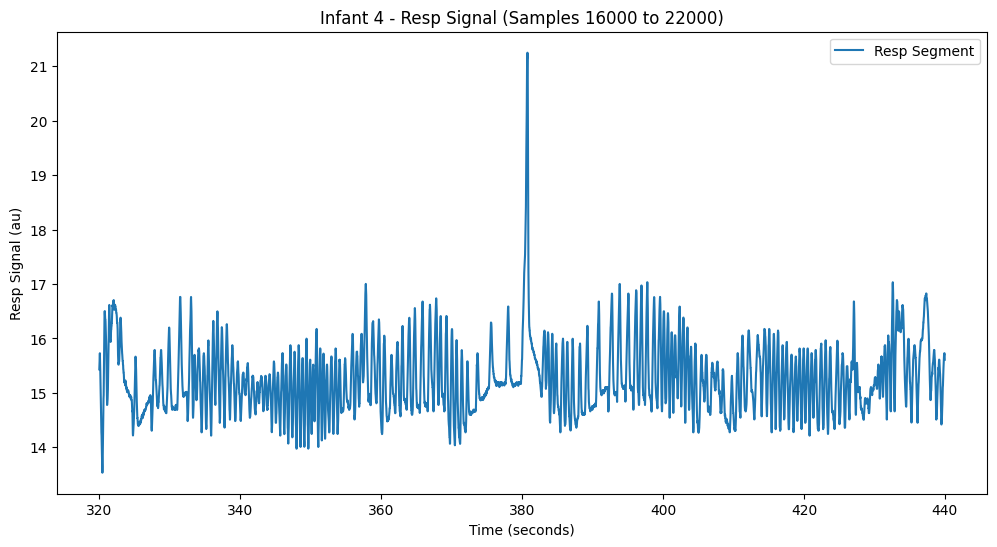

'Sampling Rate: 50Hz '

In [54]:
plot_resp_segment(4,16000, 22000)

In [213]:
#infant55 pre analysis 

ecg5_header_path = 'infant5_ecg'
resp5_header_path = 'infant5_resp'

ecg5_header = inspect_header(ecg5_header_path)
print('\n')
ecg5_r_peaks = inspect_annotation('infant5_ecg', 'qrsc') #First 10 R Peaks
print('\n')
resp5_header = inspect_header(resp5_header_path)
print('\n')
resp5_peaks = inspect_annotation('infant5_resp','resp') #First 10 respiration peaks


Record Name: infant5_ecg
Number of Signals: 1
Sampling Frequency: 250 Hz
Signal Length: 43878723 samples
Signals: ['ECG']
Signal Description: []


Annotation Type: qrsc
Annotation Sample Points: [407645 407729 407835 407940 408038 408140 408238 408338 408435 408532]


Record Name: infant5_resp
Number of Signals: 1
Sampling Frequency: 50 Hz
Signal Length: 8955598 samples
Signals: ['RESP']
Signal Description: []


Annotation Type: resp
Annotation Sample Points: [252822 252879 252935 252990 253077 253108 253137 253197 253300 253407]


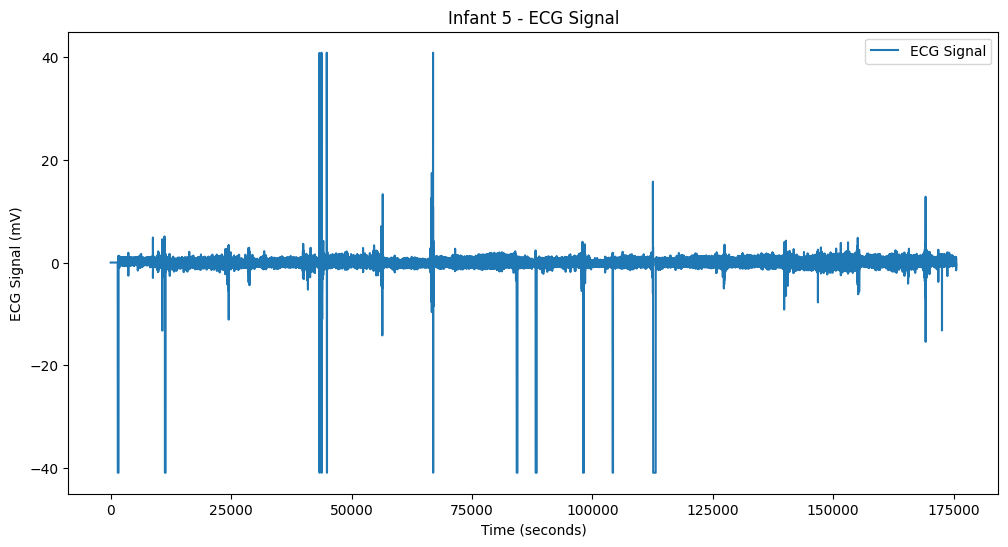

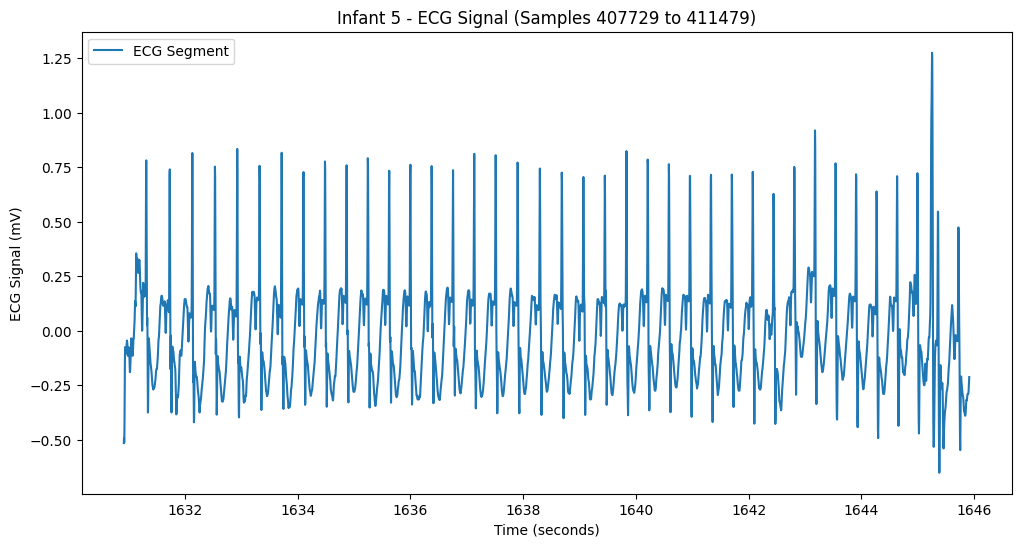

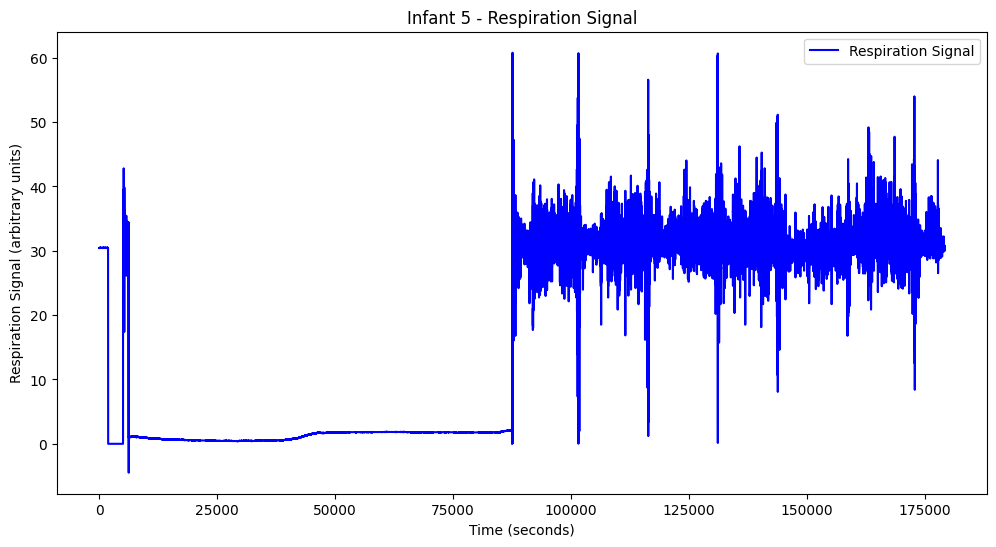

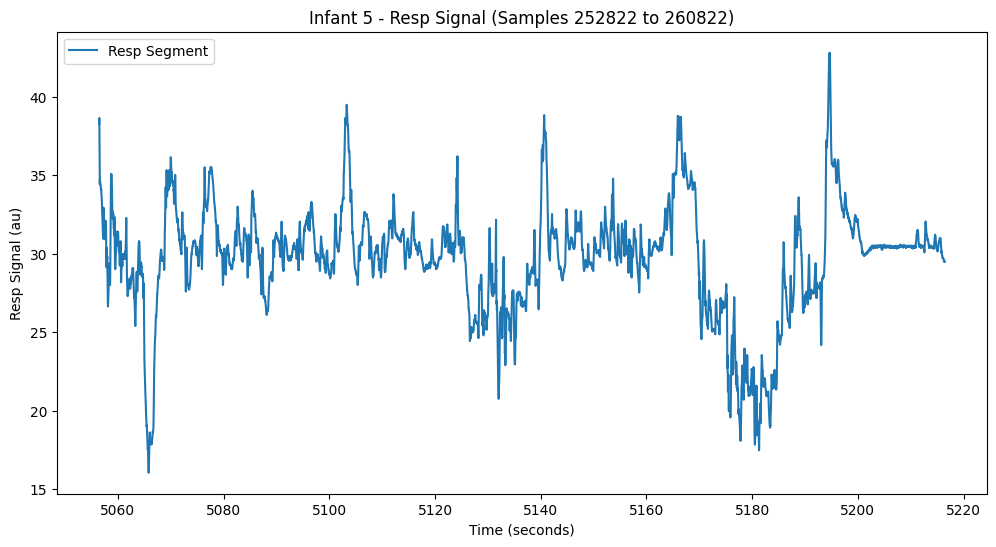

'Sampling Rate: 50Hz '

In [234]:
plot_ecg_signal(5)
plot_ecg_segment(5,407729, 407729 + 3750)
plot_resp_signal(5)
plot_resp_segment(5,252822, 252822 + 8000)


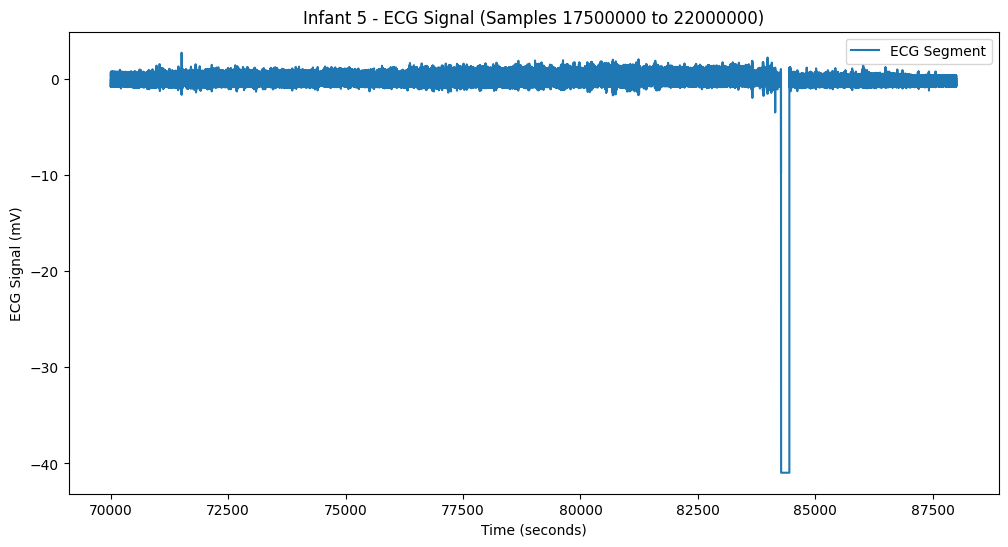

'Sampling Rate: 250Hz '

In [57]:
plot_ecg_segment(5,int(17.5e6), int(17.5e6) + int(4.5e6) )

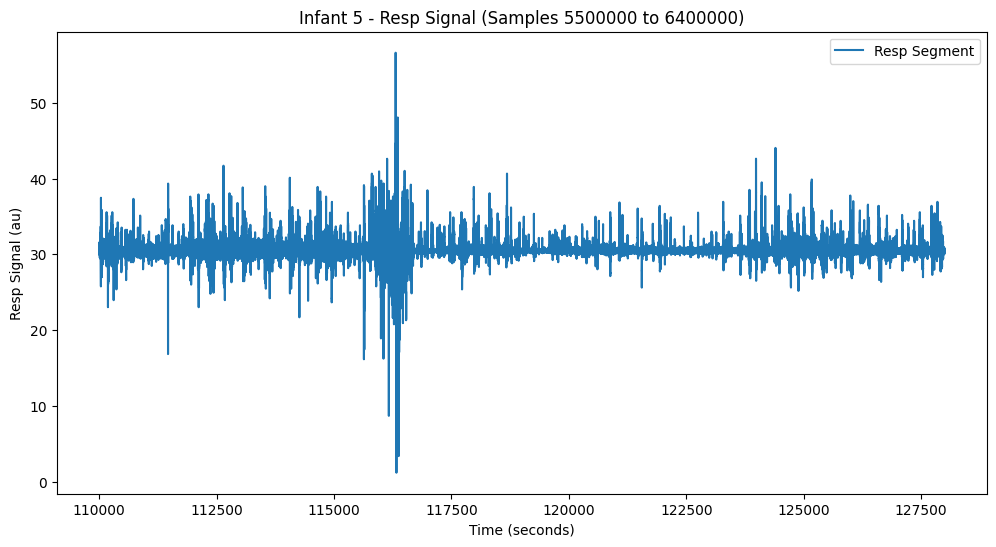

'Sampling Rate: 50Hz '

In [62]:
plot_resp_segment(5,int(5.5e6), int(5.5e6) + int(900e3))

In [235]:
#infant5 pre analysis

ecg6_header_path = 'infant6_ecg'
resp6_header_path = 'infant6_resp'

ecg6_header = inspect_header(ecg6_header_path)
print('\n')
ecg6_r_peaks = inspect_annotation('infant6_ecg', 'qrsc') #First 10 R Peaks
print('\n')
resp6_header = inspect_header(resp6_header_path)
print('\n')
resp6_peaks = inspect_annotation('infant6_resp','resp') #First 10 respiration peaks


Record Name: infant6_ecg
Number of Signals: 1
Sampling Frequency: 500 Hz
Signal Length: 87492197 samples
Signals: ['II']
Signal Description: []


Annotation Type: qrsc
Annotation Sample Points: [ 149  373  596  820 1043 1265 1487 1709 1931 2153]


Record Name: infant6_resp
Number of Signals: 1
Sampling Frequency: 50 Hz
Signal Length: 8749057 samples
Signals: ['RESP']
Signal Description: []


Annotation Type: resp
Annotation Sample Points: [ 24  59  91 125 156 185 210 236 261 288]


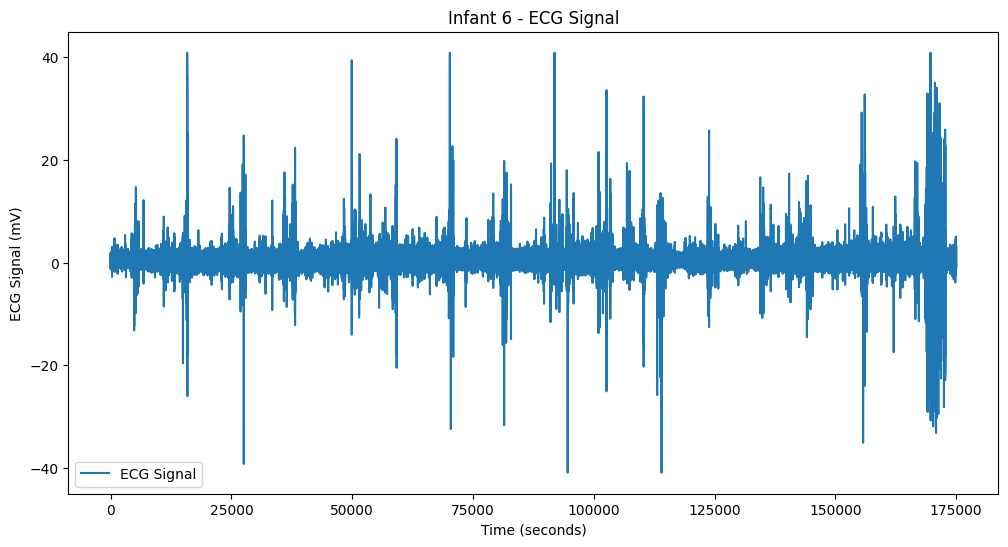

In [236]:
plot_ecg_signal(6)

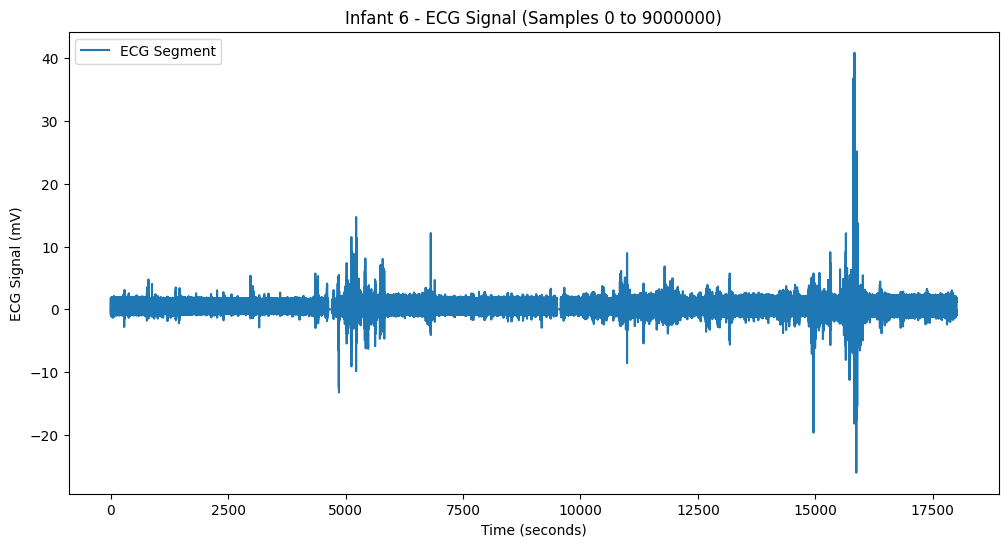

'Sampling Rate: 500Hz '

In [60]:
plot_ecg_segment(6,0,int(9e6))

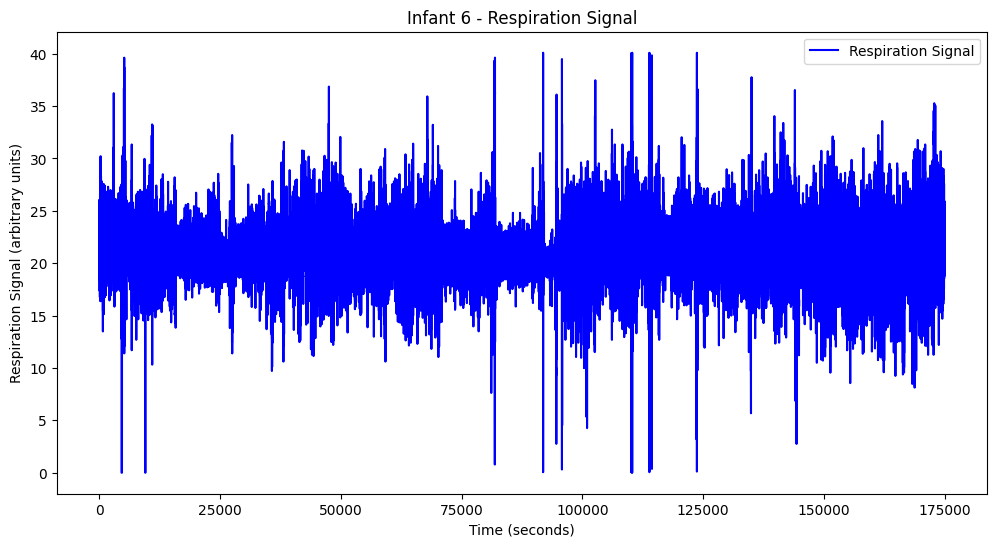

In [242]:
plot_resp_signal(6)

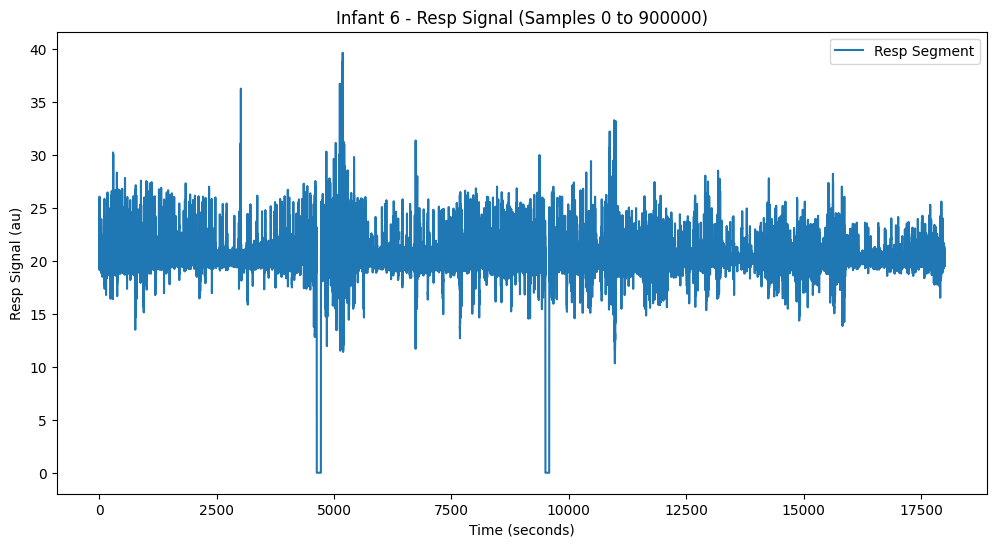

'Sampling Rate: 50Hz '

In [63]:
plot_resp_segment(6,0,int(900e3))

In [247]:
#infant 7 pre analysis

ecg7_header_path = 'infant7_ecg'
resp7_header_path = 'infant7_resp'

ecg7_header = inspect_header(ecg7_header_path)
print('\n')
ecg7_r_peaks = inspect_annotation('infant7_ecg', 'qrsc') #First 10 R Peaks
print('\n')
resp7_header = inspect_header(resp7_header_path)
print('\n')
resp7_peaks = inspect_annotation('infant7_resp','resp') #First 10 respiration peaks


Record Name: infant7_ecg
Number of Signals: 1
Sampling Frequency: 500 Hz
Signal Length: 36604500 samples
Signals: ['II']
Signal Description: []


Annotation Type: qrsc
Annotation Sample Points: [15110 15273 15437 15601 15764 15928 16091 16255 16418 16581]


Record Name: infant7_resp
Number of Signals: 1
Sampling Frequency: 50 Hz
Signal Length: 3660288 samples
Signals: ['RESP']
Signal Description: []


Annotation Type: resp
Annotation Sample Points: [  58   99  163  226  281  313 1568 1627 1658 1754]


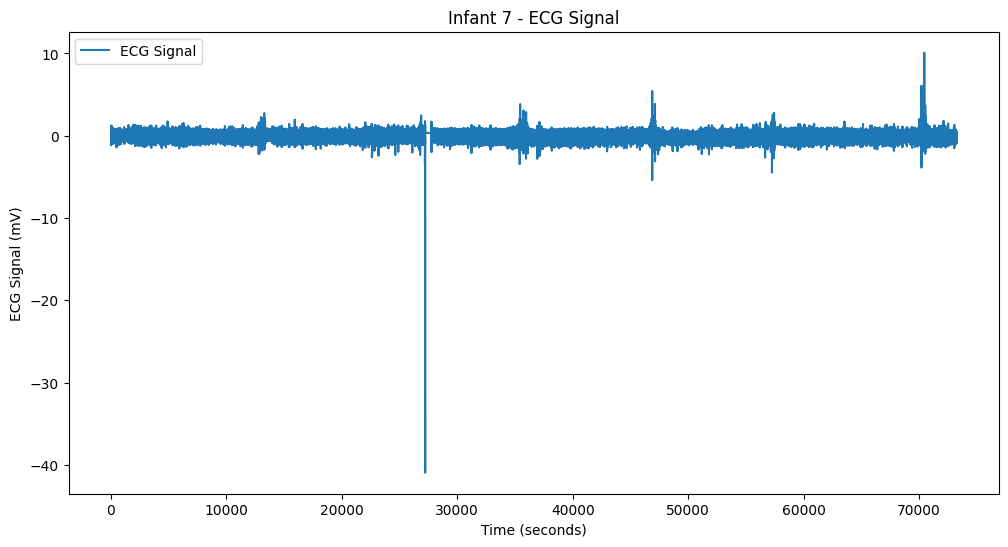

In [248]:
plot_ecg_signal(7)

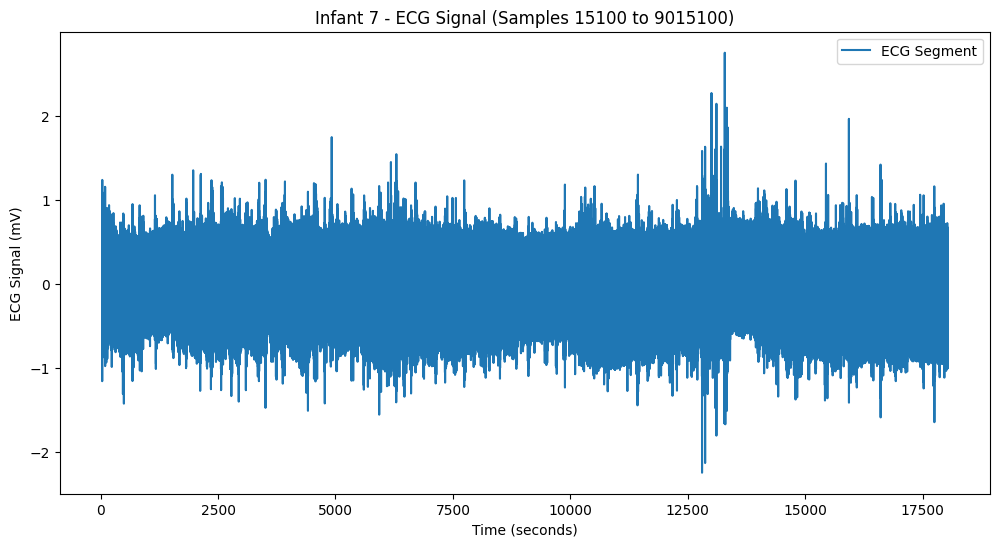

'Sampling Rate: 500Hz '

In [65]:
plot_ecg_segment(7,15100, 15100+int(9e6) )

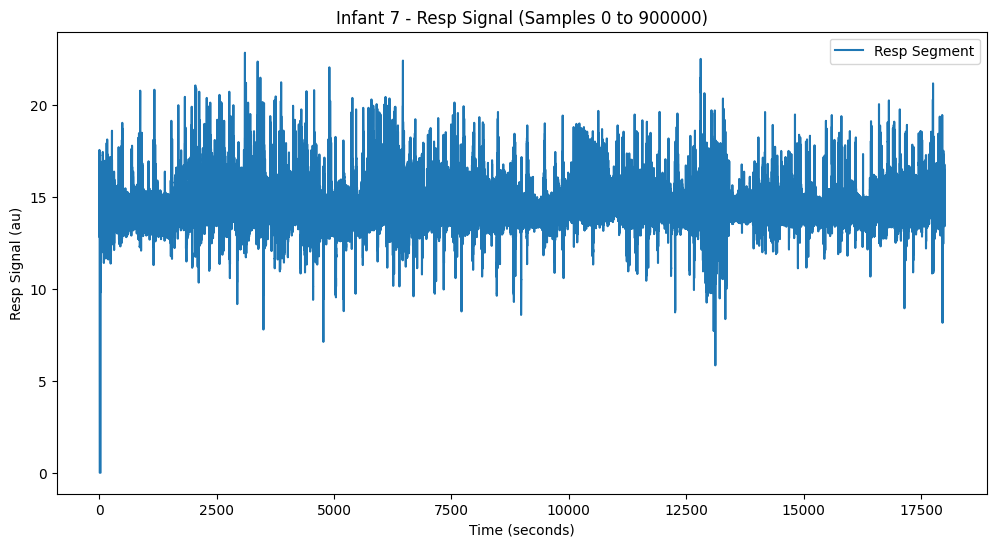

'Sampling Rate: 50Hz '

In [67]:
plot_resp_segment(7,0,int(900e3))

In [263]:
#infant 8 pre analysis

ecg8_header_path = 'infant8_ecg'
resp8_header_path = 'infant8_resp'

ecg8_header = inspect_header(ecg8_header_path)
print('\n')
ecg8_r_peaks = inspect_annotation('infant8_ecg', 'qrsc') #First 10 R Peaks
print('\n')
resp8_header = inspect_header(resp8_header_path)
print('\n')
resp8_peaks = inspect_annotation('infant8_resp','resp') #First 10 respiration peaks


Record Name: infant8_ecg
Number of Signals: 1
Sampling Frequency: 500 Hz
Signal Length: 44288000 samples
Signals: ['II']
Signal Description: []


Annotation Type: qrsc
Annotation Sample Points: [  49  245  440  635  831 1027 1224 1422 1619 1815]


Record Name: infant8_resp
Number of Signals: 1
Sampling Frequency: 50 Hz
Signal Length: 4428613 samples
Signals: ['RESP']
Signal Description: []


Annotation Type: resp
Annotation Sample Points: [ 72 111 158 198 233 263 293 318 372 421]


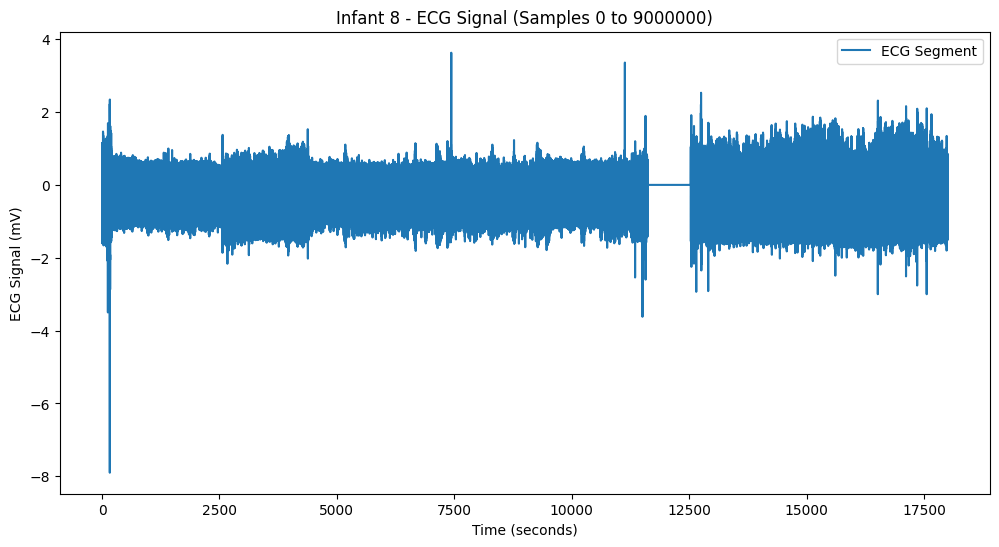

'Sampling Rate: 500Hz '

In [72]:
plot_ecg_segment(8,0,int(9e6))

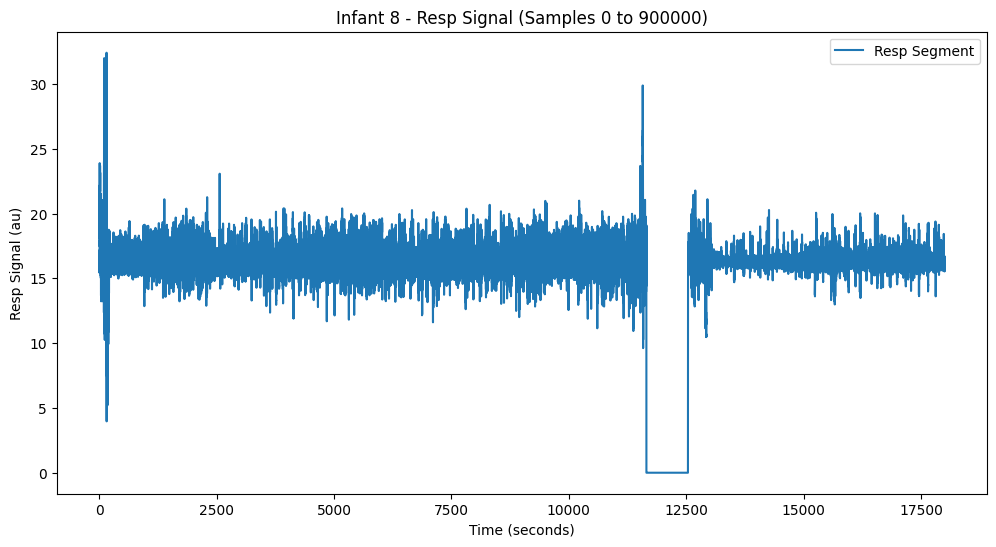

'Sampling Rate: 50Hz '

In [73]:
plot_resp_segment(8,0,int(900e3))

In [264]:
#infant 9 pre analysis

ecg9_header_path = 'infant9_ecg'
resp9_header_path = 'infant9_resp'

ecg9_header = inspect_header(ecg9_header_path)
print('\n')

ecg9_r_peaks = inspect_annotation('infant9_ecg', 'qrsc') #First 10 R Peaks

print('\n')

resp9_header = inspect_header(resp9_header_path)

print('\n')

resp9_peaks = inspect_annotation('infant9_resp','resp') #First 10 respiration peaks

Record Name: infant9_ecg
Number of Signals: 1
Sampling Frequency: 500 Hz
Signal Length: 126569088 samples
Signals: ['II']
Signal Description: []


Annotation Type: qrsc
Annotation Sample Points: [ 199  409  622  834 1047 1258 1470 1681 1890 2101]


Record Name: infant9_resp
Number of Signals: 1
Sampling Frequency: 50 Hz
Signal Length: 12656784 samples
Signals: ['RESP']
Signal Description: []


Annotation Type: resp
Annotation Sample Points: [29582 29632 29643 29687 29734 29781 29830 29893 29960 30038]


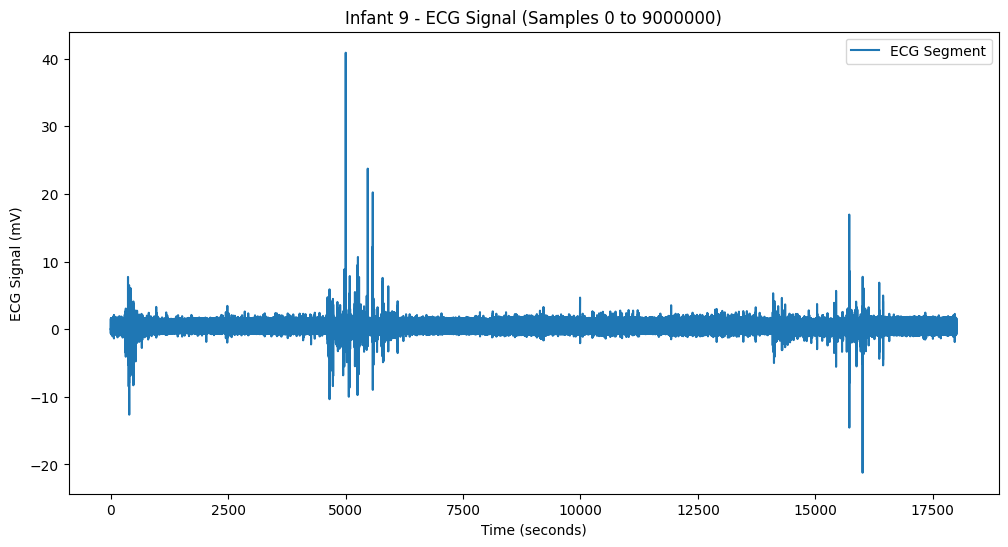

'Sampling Rate: 500Hz '

In [74]:
plot_ecg_segment(9,0,int(9e6))

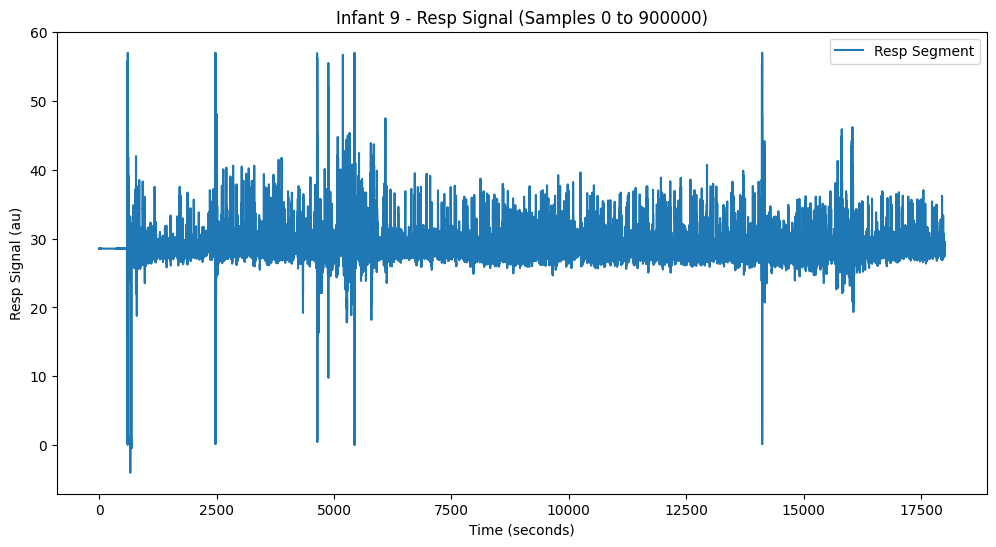

'Sampling Rate: 50Hz '

In [75]:
plot_resp_segment(9,0,int(900e3))

In [265]:
#infant 10 preanalysis

ecg10_header_path = 'infant10_ecg'
resp10_header_path = 'infant10_resp'

ecg10_header = inspect_header(ecg10_header_path)
print('\n')

ecg10_r_peaks = inspect_annotation('infant10_ecg', 'qrsc') #First 10 R Peaks

print('\n')

resp10_header = inspect_header(resp10_header_path)

print('\n')

resp10_peaks = inspect_annotation('infant10_resp','resp') #First 10 respiration peaks


Record Name: infant10_ecg
Number of Signals: 1
Sampling Frequency: 500 Hz
Signal Length: 85083254 samples
Signals: ['I']
Signal Description: []


Annotation Type: qrsc
Annotation Sample Points: [28582 28770 28961 29149 29342 29535 29735 29934 30142 30356]


Record Name: infant10_resp
Number of Signals: 1
Sampling Frequency: 50 Hz
Signal Length: 8508154 samples
Signals: ['RESP']
Signal Description: []


Annotation Type: resp
Annotation Sample Points: [  40   56  193  260  288  338 1506 1542 1584 1625]


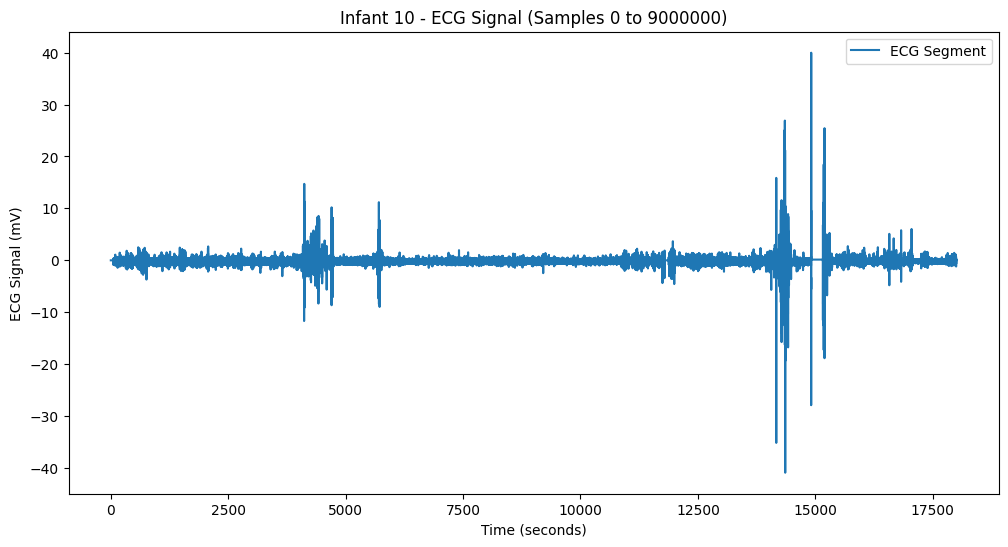

'Sampling Rate: 500Hz '

In [76]:
plot_ecg_segment(10,0,int(9e6))

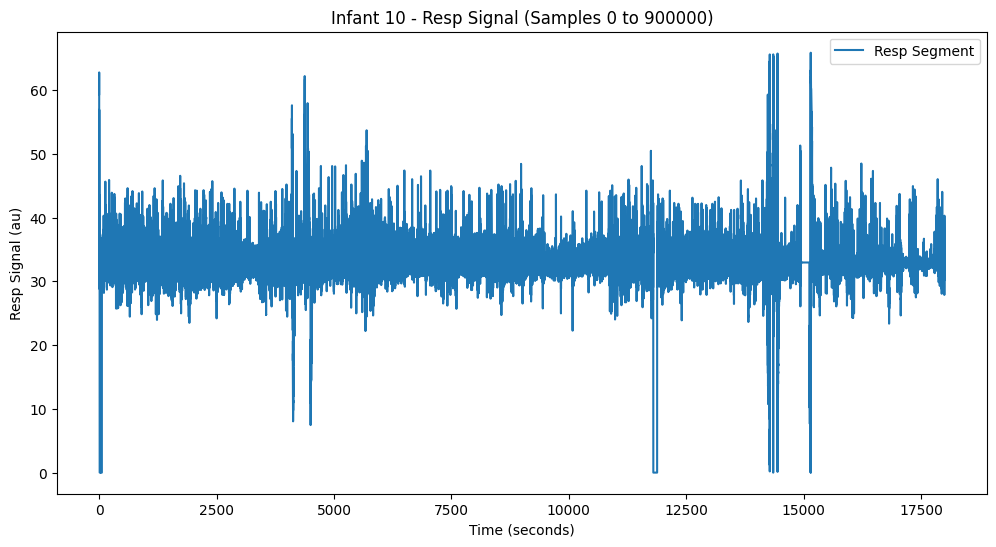

'Sampling Rate: 50Hz '

In [77]:
plot_resp_segment(10,0,int(900e3))